In [1]:
teams = {
        "Atlanta Hawks": 1610612737,
        "Boston Celtics": 1610612738,
        "Brooklyn Nets": 1610612751,
        "Charlotte Bobcats": 1610612766,
        "Charlotte Hornets": 1610612766,
        "Chicago Bulls": 1610612741,
        "Cleveland Cavaliers": 1610612739,
        "Dallas Mavericks": 1610612742,
        "Denver Nuggets": 1610612743,
        "Detroit Pistons": 1610612765,
        "Golden State Warriors": 1610612744,
        "Houston Rockets": 1610612745,
        "Indiana Pacers": 1610612754,
        "LA Clippers": 1610612746,
        "Los Angeles Clippers": 1610612746,
        "Los Angeles Lakers": 1610612747,
        "Memphis Grizzlies": 1610612763,
        "Miami Heat": 1610612748,
        "Milwaukee Bucks": 1610612749,
        "Minnesota Timberwolves": 1610612750,
        "New Jersey Nets": 1610612751,
        "New Orleans Hornets": 1610612740,
        "New Orleans Pelicans": 1610612740,
        "New York Knicks": 1610612752,
        "Oklahoma City Thunder": 1610612760,
        "Orlando Magic": 1610612753,
        "Philadelphia 76ers": 1610612755,
        "Phoenix Suns": 1610612756,
        "Portland Trail Blazers": 1610612757,
        "Sacramento Kings": 1610612758,
        "San Antonio Spurs": 1610612759,
        "Toronto Raptors": 1610612761,
        "Utah Jazz": 1610612762,
        "Washington Wizards": 1610612764,
    }

available_stats = {'W_PCT': 'Base',
                   'FG_PCT': 'Base',
                   'FG3_PCT': 'Base',
                   'FT_PCT': 'Base',
                   'REB': 'Base',
                   'AST': 'Base',
                   'TOV': 'Base',
                   'STL': 'Base',
                   'BLK': 'Base',
                   'PLUS_MINUS': 'Base',
                   'OFF_RATING': 'Advanced',
                   'DEF_RATING': 'Advanced',
                   'TS_PCT': 'Advanced'}


In [2]:
#from team_names import teams\
import nba_api
from nba_api.stats.endpoints import teamdashboardbygeneralsplits, leaguedashteamstats
import time
import pandas as pd


def get_team_stats_dict(team, start_date, end_date, season='2021-22'):
    """
    Returns the stats for the specified team in a dataframe, default year is 2020-21
    :param team: Day of games scheduled in form 'mm/dd/yyyy'
    :param season: Day of games scheduled in form 'mm/dd/yyyy'
    :return: A dictionary of game matchups {home_team:[away_team]}
    """

    time.sleep(1)

    general_team_info = teamdashboardbygeneralsplits.TeamDashboardByGeneralSplits(team_id=teams[team],
                                                                                  per_mode_detailed='Per100Possessions',
                                                                                  season=season,
                                                                                  date_from_nullable=start_date,
                                                                                  date_to_nullable=end_date,

                                                                                  timeout=120)
    general_team_dict = general_team_info.get_normalized_dict()
    general_team_dashboard = general_team_dict['OverallTeamDashboard'][0]

    win_percentage = general_team_dashboard['W_PCT']
    fg_percentage = general_team_dashboard['FG_PCT']
    fg3_percentage = general_team_dashboard['FG3_PCT']
    ft_percentage = general_team_dashboard['FT_PCT']
    rebounds = general_team_dashboard['REB']
    assists = general_team_dashboard['AST']
    turnovers = general_team_dashboard['TOV']
    steals = general_team_dashboard['STL']
    blocks = general_team_dashboard['BLK']
    plus_minus = general_team_dashboard['PLUS_MINUS']

    advanced_team_info = teamdashboardbygeneralsplits.TeamDashboardByGeneralSplits(team_id=teams[team],
                                                                                   measure_type_detailed_defense='Advanced',
                                                                                   season=season,
                                                                                   date_from_nullable=start_date,
                                                                                   date_to_nullable=end_date,
                                                                                   
                                                                                   timeout=120)
    advanced_team_dict = advanced_team_info.get_normalized_dict()
    advanced_team_dashboard = advanced_team_dict['OverallTeamDashboard'][0]

    offensive_rating = advanced_team_dashboard['OFF_RATING']
    defensive_rating = advanced_team_dashboard['DEF_RATING']
    true_shooting_percentage = advanced_team_dashboard['TS_PCT']

    all_stats_dict = {
        'W_PCT': win_percentage,
        'FG_PCT': fg_percentage,
        'FG3_PCT': fg3_percentage,
        'FT_PCT': ft_percentage,
        'REB': rebounds,
        'AST': assists,
        'TOV': turnovers,
        'STL': steals,
        'BLK': blocks,
        'PLUS_MINUS': plus_minus,
        'OFF_RATING': offensive_rating,
        'DEF_RATING': defensive_rating,
        'TS_PCT': true_shooting_percentage
    }

    return all_stats_dict

get_team_stats_dict('Golden State Warriors', '10/19/2021', '04/10/2022', '2021-22')

{'W_PCT': 0.646,
 'FG_PCT': 0.469,
 'FG3_PCT': 0.364,
 'FT_PCT': 0.769,
 'REB': 45.9,
 'AST': 27.4,
 'TOV': 15.0,
 'STL': 8.9,
 'BLK': 4.6,
 'PLUS_MINUS': 5.6,
 'OFF_RATING': 112.1,
 'DEF_RATING': 106.6,
 'TS_PCT': 0.582}

In [3]:

from nba_api.stats.endpoints import leaguegamelog, scoreboard
#from team_names import teams


def get_match_results(date, season):
    """
    Returns the matchup and result of the game

    :param date: Day of games scheduled in form 'mm/dd/yyyy'
    :param season: Season in form of 'yyyy-yy'
    :return: [{Boston Celtics: Los Angeles Lakers}], ['W']
    """
    game_log = leaguegamelog.LeagueGameLog(season=season, league_id='00', date_from_nullable=date,
                                           date_to_nullable=date, season_type_all_star='Regular Season', timeout=120)
    game_log_dict = game_log.get_normalized_dict()
    list_of_teams = game_log_dict['LeagueGameLog']

    daily_match = {}
    win_loss = []

    for i in range(0, len(list_of_teams), 2):

        if '@' in list_of_teams[i]['MATCHUP']:

            away_team = list_of_teams[i]['TEAM_NAME']
            home_team = list_of_teams[i + 1]['TEAM_NAME']

            win_loss.append(list_of_teams[i + 1]['WL'])

        else:
            away_team = list_of_teams[i + 1]['TEAM_NAME']
            home_team = list_of_teams[i]['TEAM_NAME']
            win_loss.append(list_of_teams[i]['WL'])

        daily_match.update({away_team: home_team})

    match_results = [daily_match, win_loss]

    return match_results


def get_daily_matches(date):
    """
    This method creates a dictionary of daily game matchups.

    :param date: Day of games scheduled in form 'mm/dd/yyyy'
    :return: A dictionary of game matchups {home_team:away_team}
    """

    daily_match = scoreboard.Scoreboard(league_id='00', game_date=date, timeout=120)
    daily_match_dict = daily_match.get_normalized_dict()
    games = daily_match_dict['GameHeader']

    match = {}

    for game in games:

        home_team_id = game['HOME_TEAM_ID']

        for team, team_id in teams.items():
            if team_id == home_team_id:
                home_team = team

        away_team_id = game['VISITOR_TEAM_ID']

        for team, team_id in teams.items():
            if team_id == away_team_id:
                away_team = team

        match.update({away_team: home_team})

    return match


def main():
    print(f"""'get_daily_matches' returns a dictionary of the games on a specified date\n{get_daily_matches('05/01/22')}\n""")
    print(f"""'get_match_results' returns the matchup plus the result\n{get_match_results('10/19/2021', '2021-22')}""")



In [4]:
from datetime import date, timedelta
import pandas as pd
import requests

#from get_stats import get_team_stats_dict
#from get_matches import get_match_results
#from standardization import z_score, stat_std, stat_mean
#from available_stats import available_stats


# [{'Sacramento Kings': 'Boston Celtics', 'Charlotte Hornets': 'Philadelphia 76ers'}, ['W', 'L']]
# team stats is a dataframe
def to_dataframe(daily_games, start_date, end_date, season): #, mean_dict, std_dict):
    full_dataframe = []
    game_number = 0  # counter to match with the correct game
    daily_results = daily_games[1]  # win or loss for each game

    for home_team, away_team in daily_games[0].items():  # loops through matchups
        home_team_stats = get_team_stats_dict(home_team, start_date, end_date, season)
        away_team_stats = get_team_stats_dict(away_team, start_date, end_date, season)

        current_game = [away_team, home_team]

        for stat, stat_type in available_stats.items():
            current_game.append(home_team_stats[stat])

        for stat, stat_type in available_stats.items():
            current_game.append(away_team_stats[stat])


        #for stat, stat_type in available_stats.items():
        #    z_score_diff = z_score_difference(home_team_stats[stat], away_team_stats[stat], mean_dict[stat], std_dict[stat])

         #   current_game.append(z_score_diff)

        if daily_results[game_number] == 'W':
            result = 1
        else:
            result = 0

        current_game.append(result)
        game_number += 1

        print(current_game)

        full_dataframe.append(current_game)

    return full_dataframe

# daily_games = get_match_results('10/19/2021', '2021-22')
# daily_games
# to_dataframe(daily_games, start_date='10/19/2021', end_date='04/10/2022', season='2021-22')

def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        

def training_set(start_year, start_month, start_day, end_year, end_month, end_day, season, season_start):
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)

    total_games = []

    for single_date in date_range(start_date, end_date):
        current_date = single_date.strftime('%m/%d/%Y')
        print(current_date)

        previous_day = single_date - timedelta(days=1)
        previous_day_formatted = previous_day.strftime('%m/%d/%Y')

        #mean_std_dictionary = mean_std_dict(season_start, previous_day_formatted, season)
        #mean_dict = mean_std_dictionary[0]
        #std_dict = mean_std_dictionary[1]

        current_day_games = get_match_results(current_date, season)
        current_day_games_with_stats = to_dataframe(current_day_games, season_start, previous_day_formatted, season)

        for game in current_day_games_with_stats:
            game.append(current_date)
            total_games.append(game)

    print(total_games)
    return total_games


def make_dataframe(game_list):
    games = pd.DataFrame(game_list,
                         columns=['Home', 'Away', 'H_W_PCT', 'H_FG_PCT', 'H_FG3_PCT', 'H_FT_PCT', 'H_REB', 'H_AST', 'H_TOV', 'H_STL',
                                  'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING', 'H_DEF_RATING', 'H_TS_PCT', 'A_W_PCT', 'A_FG_PCT', 'A_FG3_PCT',
                                  'A_FT_PCT', 'A_REB', 'A_AST', 'A_TOV', 'A_STL',
                                  'A_BLK', 'A_PLUS_MINUS', 'A_OFF_RATING', 'A_DEF_RATING', 'A_TS_PCT','Result', 'Date'])

    print(games)
    return games


def main():
    attempts = 10

    for i in range(attempts):
        try:
            all_games = training_set(start_year=2021, start_month=10, start_day=19, end_year=2022, end_month=4, end_day=10,
                             season='2021-22', season_start='10/19/2021')
            df = make_dataframe(all_games)

            print(df)
            df.to_csv(r'C:\Users\alvaro\OneDrive\Documents\School\Flatiron\Projects\NBA_Model\nba_22_data.csv', index=False)
        except requests.exceptions.ReadTimeout:
            if i < attempts - 1:
                continue
            else:
                raise
        break


#if __name__ == '__main__':
    #main()



# Dataset

## 2018-2019

In [1]:
import pandas as pd
df_2018 = pd.read_csv('./nba_data/nba_df_2018.csv')
df_2018['Date'] = pd.to_datetime(df_2018['Date'])
df_2018['Season'] = '2018-19'
len(df_2018)

1203

## 2019 - 2020

In [2]:
df_2019 = pd.read_csv('./nba_data/nba_df_2019.csv')
df_2019['Date'] = pd.to_datetime(df_2019['Date'])
df_2019['Season'] = '2019-20'

df_2019_2 = pd.read_csv('./nba_data/nba_df_2019_2.csv')
df_2019_2['Date'] = pd.to_datetime(df_2019_2['Date'])
df_2019_2['Season'] = '2019-20'

print(len(df_2019), len(df_2019_2))

951 84


In [3]:
frames = [df_2019, df_2019_2]
df_2019_final = pd.concat(frames)
len(df_2019_final)

1035

## 2020 - 2021

In [4]:
df_2020 = pd.read_csv('./nba_data/nba_df_2020.csv')
df_2020['Date'] = pd.to_datetime(df_2020['Date'])
df_2020['Season'] = '2020-21'
len(df_2020)

582

In [5]:
frames = [df_2018, df_2019_final, df_2020]
df = pd.concat(frames)
df = df.reset_index(drop=True)

In [6]:
df = df.reset_index(drop=True)
len(df)

2820

# Last N Games Win %

In [7]:
import warnings
warnings.filterwarnings("ignore")
prev_game_df = df[df['Date'] < '12/12/2020'][(df['Home'] == "Milwaukee Bucks") | (df['Away'] == 'Milwaukee Bucks')].sort_values(by = 'Date').tail(10)
prev_game_df
h_df = prev_game_df.iloc[:, range(0,32,31)]

h_df = h_df.loc[h_df['Home'] == 'Milwaukee Bucks'] 
print(h_df)

                 Home  Result
2159  Milwaukee Bucks       1
2182  Milwaukee Bucks       0
2193  Milwaukee Bucks       1
2219  Milwaukee Bucks       0


In [8]:
def get_avg_win_pct_last_n_games(team, game_date, df, n):
    prev_game_df = df[df['Date'] < game_date][(df['Home'] == team) | (df['Away'] == team)].sort_values(by = 'Date').tail(n)
    
    wins = 0 
    
    result_df = prev_game_df.iloc[:, range(0,32,31)]
    h_df = result_df.loc[result_df['Home'] == team] 
    
    h_wins = h_df.loc[h_df['Result'] == 1]
    
    wins += len(h_wins)
      
    a_df = result_df.loc[result_df['Home'] != team]
    a_wins = a_df.loc[a_df['Result'] == 0]
    
    wins += len(a_wins)

    return wins/n
get_avg_win_pct_last_n_games('Milwaukee Bucks', '12/12/2020', df, 10)

0.3

In [9]:
for season in df['Season'].unique() :
    
    season_stats = df[df['Season'] == season].sort_values(by='Date').reset_index(drop=True)
    
    for index, row in df.iterrows() : 
        game_id = row['Game_ID']
        game_date = row['Date']
        h_team = row['Home']
        a_team = row['Away']
        
        df.loc[index,'Home_W_Pct_10'] = get_avg_win_pct_last_n_games(h_team, game_date, df, 10)
        
        df.loc[index,'Away_W_Pct_10'] = get_avg_win_pct_last_n_games(a_team, game_date, df, 10)
        

In [11]:
df[df['Season'] == '2020-21'].tail()


,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_BLK,A_PLUS_MINUS,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10
2815,Houston Rockets,Detroit Pistons,22000635,100,0.282,0.433,0.326,0.740,41.8,21.7,...,5.1,-3.9,108.3,112.0,0.553,0,2021-03-19,2020-21,0.0,0.3
2816,Toronto Raptors,Utah Jazz,22000634,112,0.425,0.448,0.378,0.826,41.3,25.1,...,5.4,8.0,116.5,108.8,0.596,0,2021-03-19,2020-21,0.2,0.5
2817,Denver Nuggets,Chicago Bulls,22000637,131,0.600,0.487,0.388,0.784,44.4,27.0,...,4.3,-0.1,111.2,111.7,0.585,1,2021-03-19,2020-21,0.8,0.5
2818,Portland Trail Blazers,Dallas Mavericks,22000639,125,0.600,0.446,0.381,0.835,44.1,20.2,...,4.7,0.1,112.9,112.5,0.580,1,2021-03-19,2020-21,0.6,0.7
2819,Phoenix Suns,Minnesota Timberwolves,22000638,113,0.667,0.490,0.384,0.831,43.6,27.4,...,5.6,-7.4,107.0,113.9,0.544,1,2021-03-19,2020-21,0.7,0.3


In [12]:
df

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_BLK,A_PLUS_MINUS,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10
0,Brooklyn Nets,New York Knicks,21800018,107,0.000,0.488,0.185,0.682,38.6,27.7,...,5.4,17.0,112.5,94.7,0.559,1,2018-10-19,2018-19,0.0,0.0
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.000,0.398,0.286,0.833,44.8,20.0,...,5.8,-7.8,97.1,104.9,0.466,1,2018-10-19,2018-19,0.0,0.0
2,Orlando Magic,Charlotte Hornets,21800017,88,1.000,0.415,0.280,0.613,49.5,19.4,...,8.7,-1.0,107.7,109.7,0.551,0,2018-10-19,2018-19,0.0,0.0
3,Utah Jazz,Golden State Warriors,21800024,123,1.000,0.519,0.481,0.737,41.1,19.6,...,6.8,7.8,104.9,97.1,0.525,0,2018-10-19,2018-19,0.0,0.0
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.000,0.494,0.412,0.750,55.3,25.2,...,7.3,29.2,115.6,87.4,0.626,1,2018-10-19,2018-19,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,Houston Rockets,Detroit Pistons,22000635,100,0.282,0.433,0.326,0.740,41.8,21.7,...,5.1,-3.9,108.3,112.0,0.553,0,2021-03-19,2020-21,0.0,0.3
2816,Toronto Raptors,Utah Jazz,22000634,112,0.425,0.448,0.378,0.826,41.3,25.1,...,5.4,8.0,116.5,108.8,0.596,0,2021-03-19,2020-21,0.2,0.5
2817,Denver Nuggets,Chicago Bulls,22000637,131,0.600,0.487,0.388,0.784,44.4,27.0,...,4.3,-0.1,111.2,111.7,0.585,1,2021-03-19,2020-21,0.8,0.5
2818,Portland Trail Blazers,Dallas Mavericks,22000639,125,0.600,0.446,0.381,0.835,44.1,20.2,...,4.7,0.1,112.9,112.5,0.580,1,2021-03-19,2020-21,0.6,0.7


# ELO Rating
- every team starts with a 1500
$$R_{i+1} = k * (S_{team} - E_{team} + R_{i})$$
- S team is 1 if the team wins and 0 if they lose
- E team is the expected win probability of the team 
$$E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$
- k is a moving constant that depends on margin of victory and difference in Elo ratings
$$k = 20\frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$
- team year by year carryover 
$$(R * 0.75) + (0.25 * 1505)$$

In [13]:
df.head()

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_BLK,A_PLUS_MINUS,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10
0,Brooklyn Nets,New York Knicks,21800018,107,0.0,0.488,0.185,0.682,38.6,27.7,...,5.4,17.0,112.5,94.7,0.559,1,2018-10-19,2018-19,0.0,0.0
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.0,0.398,0.286,0.833,44.8,20.0,...,5.8,-7.8,97.1,104.9,0.466,1,2018-10-19,2018-19,0.0,0.0
2,Orlando Magic,Charlotte Hornets,21800017,88,1.0,0.415,0.280,0.613,49.5,19.4,...,8.7,-1.0,107.7,109.7,0.551,0,2018-10-19,2018-19,0.0,0.0
3,Utah Jazz,Golden State Warriors,21800024,123,1.0,0.519,0.481,0.737,41.1,19.6,...,6.8,7.8,104.9,97.1,0.525,0,2018-10-19,2018-19,0.0,0.0
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.0,0.494,0.412,0.750,55.3,25.2,...,7.3,29.2,115.6,87.4,0.626,1,2018-10-19,2018-19,0.0,0.0


In [14]:
# Home and road team win probabilities implied by Elo ratings and home court adjustment 
import math
import time
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400) 

    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom 
  
    return home_prob, away_prob

  #odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    return a*h/r

#this function determines the constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20 # Optimal K is 20 https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier


# Updates the home and away teams elo ratings after a game 

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 

    if (home_score - away_score > 0) :
        home_win = 1 
        away_win = 0 
    else :
        home_win = 0 
        away_win = 1 
  
    k = elo_k(home_score - away_score, home_elo - away_elo)

    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo


# Takes into account prev season elo
# The reason we revert to a mean of 1505 rather than 1500 is that 
# there are liable to be a couple of relatively recent expansion teams in the league at any given time
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['Home'] == team) | (team_stats['Away'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 

    if team == prev_game['Home'] :
        elo_rating = elo_df[elo_df['Game_ID'] == prev_game['Game_ID']]['H_Team_Elo_After'].values[0]
    else :
        elo_rating = elo_df[elo_df['Game_ID'] == prev_game['Game_ID']]['A_Team_Elo_After'].values[0]
  
    if prev_game['Season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505) # Year-to-Year Carry-Over
    else :
        return elo_rating

In [15]:
df.sort_values(by = 'Date', inplace = True)
df.reset_index(inplace=True, drop = True)
elo_df = pd.DataFrame(columns=['Game_ID', 'H_Team', 'A_Team', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['Game_ID','Team', 'Elo', 'Date', 'Where_Played', 'Season']) 

for index, row in df.iterrows(): 
    game_id = row['Game_ID']
    game_date = row['Date']
    season = row['Season']
    h_team, a_team = row['Home'], row['Away']
    h_score, a_score = row['H_Score'], row['A_Score'] 

    if (h_team not in elo_df['H_Team'].values and h_team not in elo_df['A_Team'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, df, elo_df)

    if (a_team not in elo_df['H_Team'].values and a_team not in elo_df['A_Team'].values) :
        a_team_elo_before = 1500
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, df, elo_df)

    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)

    new_row = {'Game_ID': game_id, 'H_Team': h_team, 'A_Team': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'Game_ID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'Season': season}
    teams_row_two = {'Game_ID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'Season': season}
  
    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)

In [16]:
#teams_elo_df.set_index(["Team"], append=True)
#dataset = teams_elo_df.pivot(index="Team",values="Elo", columns="Date")
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: time.strptime(x, '%m-%d-%Y'))
teams = df["Away"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")

for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)

elo_df

,Game_ID,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,21800018,Brooklyn Nets,New York Knicks,1500,1500,1503.884686,1496.115314
1,21800025,LA Clippers,Oklahoma City Thunder,1500,1500,1511.302715,1488.697285
2,21800017,Orlando Magic,Charlotte Hornets,1500,1500,1472.588402,1527.411598
3,21800024,Utah Jazz,Golden State Warriors,1500,1500,1495.165763,1504.834237
4,21800023,Milwaukee Bucks,Indiana Pacers,1500,1500,1511.776166,1488.223834
...,...,...,...,...,...,...,...
2815,22000633,Orlando Magic,Brooklyn Nets,1361.862814,1602.339397,1378.242844,1585.959368
2816,22000435,Cleveland Cavaliers,San Antonio Spurs,1352.067103,1511.547921,1346.955949,1516.659075
2817,22000631,Boston Celtics,Sacramento Kings,1525.805182,1412.532582,1507.86916,1430.468604
2818,22000632,Miami Heat,Indiana Pacers,1545.276747,1495.06669,1517.198154,1523.145283


In [20]:
df.head()

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_BLK,A_PLUS_MINUS,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10
0,Brooklyn Nets,New York Knicks,21800018,107,0.0,0.488,0.185,0.682,38.6,27.7,...,5.4,17.0,112.5,94.7,0.559,1,2018-10-19,2018-19,0.0,0.0
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.0,0.398,0.286,0.833,44.8,20.0,...,5.8,-7.8,97.1,104.9,0.466,1,2018-10-19,2018-19,0.0,0.0
2,Orlando Magic,Charlotte Hornets,21800017,88,1.0,0.415,0.280,0.613,49.5,19.4,...,8.7,-1.0,107.7,109.7,0.551,0,2018-10-19,2018-19,0.0,0.0
3,Utah Jazz,Golden State Warriors,21800024,123,1.0,0.519,0.481,0.737,41.1,19.6,...,6.8,7.8,104.9,97.1,0.525,0,2018-10-19,2018-19,0.0,0.0
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.0,0.494,0.412,0.750,55.3,25.2,...,7.3,29.2,115.6,87.4,0.626,1,2018-10-19,2018-19,0.0,0.0


In [18]:
df = df.merge(elo_df.drop(columns=['H_Team', 'A_Team']), on ='Game_ID')
df.head()

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,Brooklyn Nets,New York Knicks,21800018,107,0.0,0.488,0.185,0.682,38.6,27.7,...,0.559,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1503.884686,1496.115314
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.0,0.398,0.286,0.833,44.8,20.0,...,0.466,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1511.302715,1488.697285
2,Orlando Magic,Charlotte Hornets,21800017,88,1.0,0.415,0.280,0.613,49.5,19.4,...,0.551,0,2018-10-19,2018-19,0.0,0.0,1500,1500,1472.588402,1527.411598
3,Utah Jazz,Golden State Warriors,21800024,123,1.0,0.519,0.481,0.737,41.1,19.6,...,0.525,0,2018-10-19,2018-19,0.0,0.0,1500,1500,1495.165763,1504.834237
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.0,0.494,0.412,0.750,55.3,25.2,...,0.626,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1511.776166,1488.223834


# Merging Dataset

# Standardization and Z Score

In [19]:
df.head()

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,Brooklyn Nets,New York Knicks,21800018,107,0.0,0.488,0.185,0.682,38.6,27.7,...,0.559,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1503.884686,1496.115314
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.0,0.398,0.286,0.833,44.8,20.0,...,0.466,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1511.302715,1488.697285
2,Orlando Magic,Charlotte Hornets,21800017,88,1.0,0.415,0.280,0.613,49.5,19.4,...,0.551,0,2018-10-19,2018-19,0.0,0.0,1500,1500,1472.588402,1527.411598
3,Utah Jazz,Golden State Warriors,21800024,123,1.0,0.519,0.481,0.737,41.1,19.6,...,0.525,0,2018-10-19,2018-19,0.0,0.0,1500,1500,1495.165763,1504.834237
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.0,0.494,0.412,0.750,55.3,25.2,...,0.626,1,2018-10-19,2018-19,0.0,0.0,1500,1500,1511.776166,1488.223834


# Evaluate Different Models - No Z Score

In [20]:
df.to_csv(r'C:\Users\alvaro\OneDrive\Documents\School\Flatiron\Projects\NBA_Model\nba_data\nba_df_final_test.csv', index = False)
print(f'The final dataset consists of three seasons and {len(df)} games.')
df = df.reset_index(drop=True)
df.tail()


The final dataset consists of three seasons and 2820 games.


,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
2815,Orlando Magic,Brooklyn Nets,22000633,121,0.325,0.430,0.353,0.790,46.9,22.7,...,0.620,1,2021-03-19,2020-21,0.1,0.9,1361.862814,1602.339397,1378.242844,1585.959368
2816,Cleveland Cavaliers,San Antonio Spurs,22000435,110,0.375,0.452,0.340,0.724,43.5,23.3,...,0.551,0,2021-03-19,2020-21,0.5,0.5,1352.067103,1511.547921,1346.955949,1516.659075
2817,Boston Celtics,Sacramento Kings,22000631,96,0.500,0.469,0.371,0.756,44.3,22.8,...,0.575,0,2021-03-19,2020-21,0.5,0.4,1525.805182,1412.532582,1507.86916,1430.468604
2818,Miami Heat,Indiana Pacers,22000632,110,0.537,0.459,0.347,0.792,43.3,26.1,...,0.574,0,2021-03-19,2020-21,0.8,0.2,1545.276747,1495.06669,1517.198154,1523.145283
2819,Phoenix Suns,Minnesota Timberwolves,22000638,113,0.667,0.490,0.384,0.831,43.6,27.4,...,0.544,1,2021-03-19,2020-21,0.7,0.3,1620.482459,1344.666889,1622.785495,1342.363853


In [21]:
df.head()
df = df.drop(labels=['H_Team_Elo_After', 'A_Team_Elo_After'], axis=1)
df.head()

,Home,Away,Game_ID,H_Score,H_W_PCT,H_FG_PCT,H_FG3_PCT,H_FT_PCT,H_REB,H_AST,...,A_OFF_RATING,A_DEF_RATING,A_TS_PCT,Result,Date,Season,Home_W_Pct_10,Away_W_Pct_10,H_Team_Elo_Before,A_Team_Elo_Before
0,Brooklyn Nets,New York Knicks,21800018,107,0.0,0.488,0.185,0.682,38.6,27.7,...,112.5,94.7,0.559,1,2018-10-19,2018-19,0.0,0.0,1500,1500
1,LA Clippers,Oklahoma City Thunder,21800025,108,0.0,0.398,0.286,0.833,44.8,20.0,...,97.1,104.9,0.466,1,2018-10-19,2018-19,0.0,0.0,1500,1500
2,Orlando Magic,Charlotte Hornets,21800017,88,1.0,0.415,0.280,0.613,49.5,19.4,...,107.7,109.7,0.551,0,2018-10-19,2018-19,0.0,0.0,1500,1500
3,Utah Jazz,Golden State Warriors,21800024,123,1.0,0.519,0.481,0.737,41.1,19.6,...,104.9,97.1,0.525,0,2018-10-19,2018-19,0.0,0.0,1500,1500
4,Milwaukee Bucks,Indiana Pacers,21800023,118,1.0,0.494,0.412,0.750,55.3,25.2,...,115.6,87.4,0.626,1,2018-10-19,2018-19,0.0,0.0,1500,1500


In [22]:
df["H_Team_Elo_Before"] = df.H_Team_Elo_Before.astype(float)
df["A_Team_Elo_Before"] = df.A_Team_Elo_Before.astype(float)
final_df = df.drop(['Home', 'Away', 'Game_ID', 'H_Score', 'A_Score', 'Date', 'Season'], axis=1)
#final_df.head()
#final_df.columns
#final_df.info()
final_df.columns

Index(['H_W_PCT', 'H_FG_PCT', 'H_FG3_PCT', 'H_FT_PCT', 'H_REB', 'H_AST',
       'H_TOV', 'H_STL', 'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'A_W_PCT', 'A_FG_PCT', 'A_FG3_PCT',
       'A_FT_PCT', 'A_REB', 'A_AST', 'A_TOV', 'A_STL', 'A_BLK', 'A_PLUS_MINUS',
       'A_OFF_RATING', 'A_DEF_RATING', 'A_TS_PCT', 'Result', 'Home_W_Pct_10',
       'Away_W_Pct_10', 'H_Team_Elo_Before', 'A_Team_Elo_Before'],
      dtype='object')

In [23]:
final_df.to_csv(r'C:\Users\alvaro\OneDrive\Documents\School\Flatiron\Projects\NBA_Model\nba_data\nbas.csv', index = False)
#final_df = pd.read_csv('./nba_data/nba_df_final.csv')

# EDA

,H_W_PCT,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PLUS_MINUS,H_OFF_RATING,H_DEF_RATING,H_TS_PCT,H_Team_Elo_Before,Home_W_Pct_10,Result
H_W_PCT,1.000000,0.502169,0.320349,-0.155375,0.033368,0.330985,0.891830,0.618593,-0.620302,0.563872,0.767739,0.660715,0.216308
H_REB,0.502169,1.000000,-0.008317,-0.068732,-0.271590,0.192550,0.528072,0.254589,-0.482581,0.030882,0.412460,0.305859,0.146231
H_AST,0.320349,-0.008317,1.000000,-0.065049,0.128100,0.122288,0.358229,0.417479,-0.071698,0.462691,0.265842,0.253016,0.078898
H_TOV,-0.155375,-0.068732,-0.065049,1.000000,0.053479,-0.075850,-0.192301,-0.359585,-0.104379,0.034659,-0.192787,-0.110525,-0.045599
H_STL,0.033368,-0.271590,0.128100,0.053479,1.000000,0.107730,0.057074,-0.156192,-0.237752,-0.142529,0.007423,0.039039,-0.000680
H_BLK,0.330985,0.192550,0.122288,-0.075850,0.107730,1.000000,0.356752,0.117938,-0.386144,0.108822,0.360240,0.241473,0.117469
H_PLUS_MINUS,0.891830,0.528072,0.358229,-0.192301,0.057074,0.356752,1.000000,0.705429,-0.683897,0.637038,0.810649,0.633992,0.232983
H_OFF_RATING,0.618593,0.254589,0.417479,-0.359585,-0.156192,0.117938,0.705429,1.000000,0.032173,0.834106,0.582885,0.453134,0.152380
H_DEF_RATING,-0.620302,-0.482581,-0.071698,-0.104379,-0.237752,-0.386144,-0.683897,0.032173,1.000000,-0.042152,-0.545494,-0.427608,-0.171022
H_TS_PCT,0.563872,0.030882,0.462691,0.034659,-0.142529,0.108822,0.637038,0.834106,-0.042152,1.000000,0.540426,0.443997,0.137470


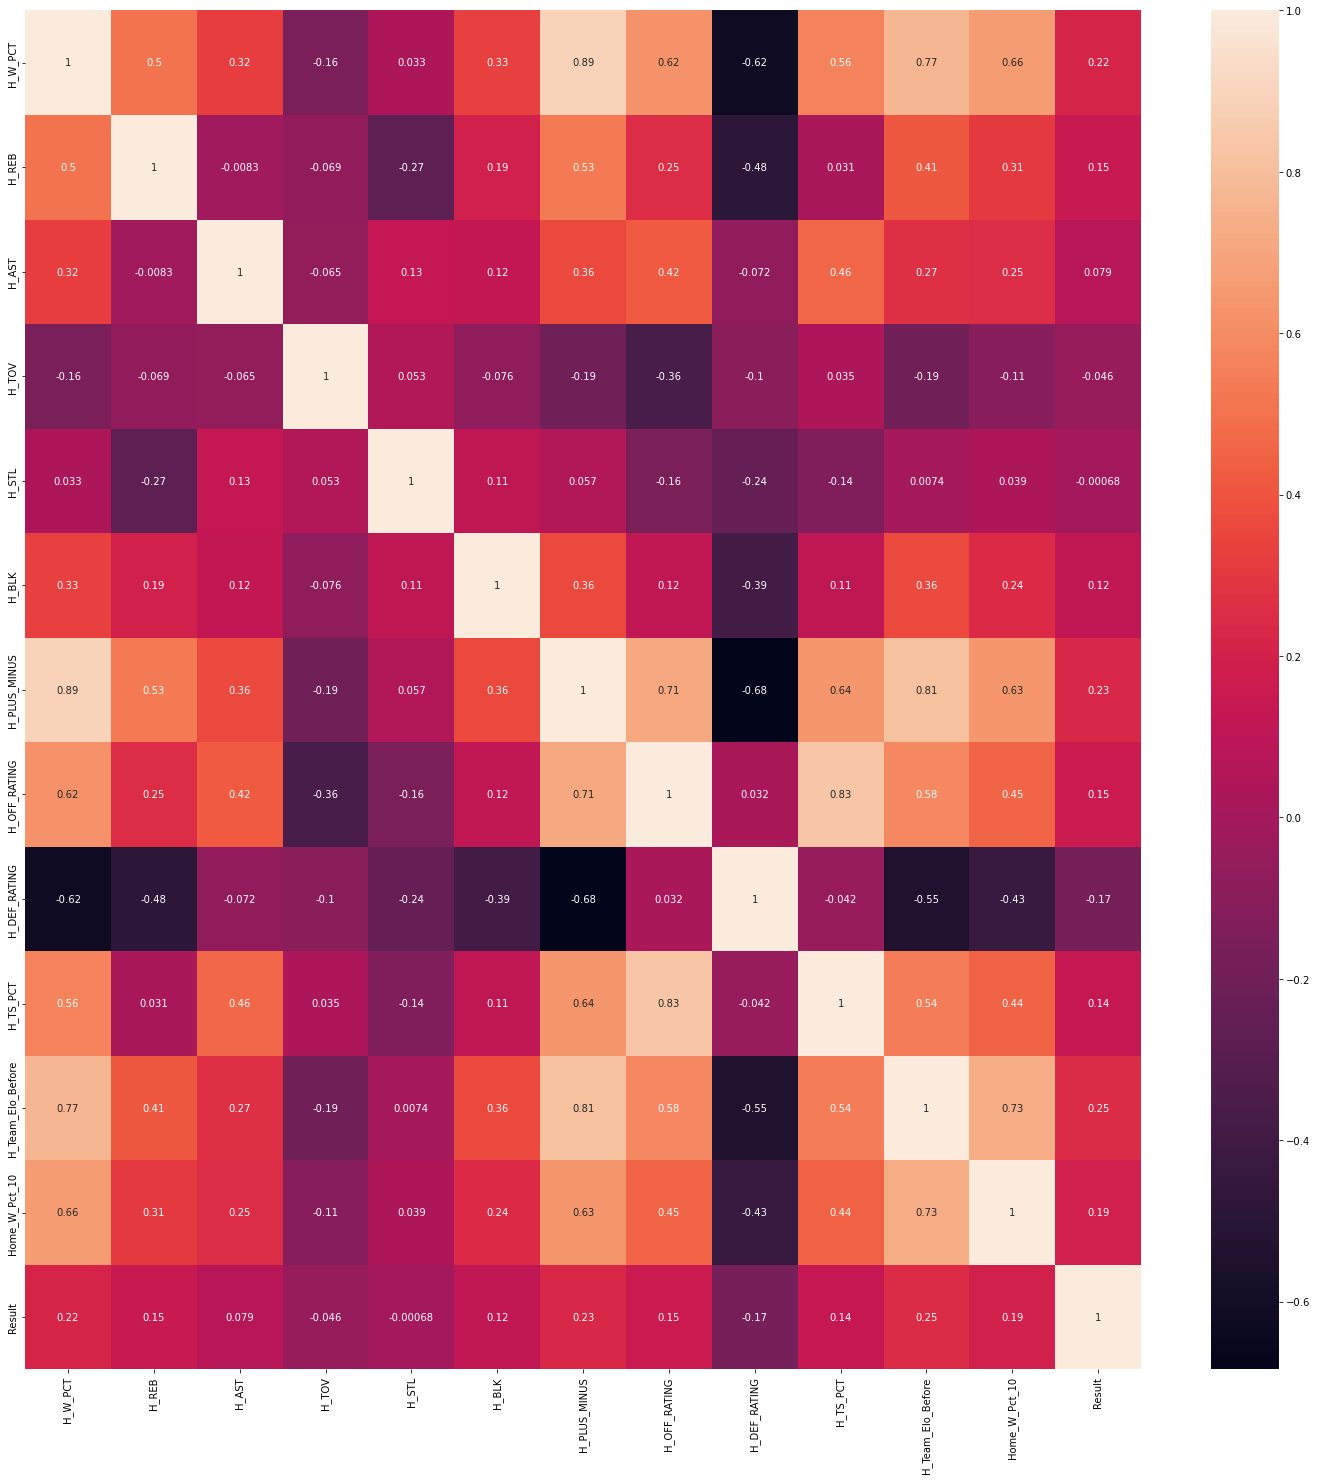

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(25, 25))
correlation = final_df[['H_W_PCT', 'H_REB', 'H_AST',
       'H_TOV', 'H_STL', 'H_BLK', 'H_PLUS_MINUS', 'H_OFF_RATING',
       'H_DEF_RATING', 'H_TS_PCT', 'H_Team_Elo_Before', 'Home_W_Pct_10', 'Result']].corr()
sns.heatmap(correlation, annot=True)
correlation

In [25]:
final_df.corr()['Result'].abs().sort_values(ascending=False)

Result               1.000000
H_Team_Elo_Before    0.250024
H_PLUS_MINUS         0.232983
H_W_PCT              0.216308
A_Team_Elo_Before    0.197502
Home_W_Pct_10        0.194694
H_DEF_RATING         0.171022
A_PLUS_MINUS         0.170770
A_W_PCT              0.156699
H_OFF_RATING         0.152380
H_REB                0.146231
Away_W_Pct_10        0.141192
H_TS_PCT             0.137470
A_OFF_RATING         0.128770
A_TS_PCT             0.124219
H_FG_PCT             0.119288
H_BLK                0.117469
A_DEF_RATING         0.110086
A_FG_PCT             0.095614
A_REB                0.092672
A_BLK                0.088289
H_AST                0.078898
H_FG3_PCT            0.078364
A_AST                0.060419
A_FG3_PCT            0.054604
H_TOV                0.045599
H_FT_PCT             0.042027
A_TOV                0.041703
A_FT_PCT             0.034755
A_STL                0.017767
H_STL                0.000680
Name: Result, dtype: float64

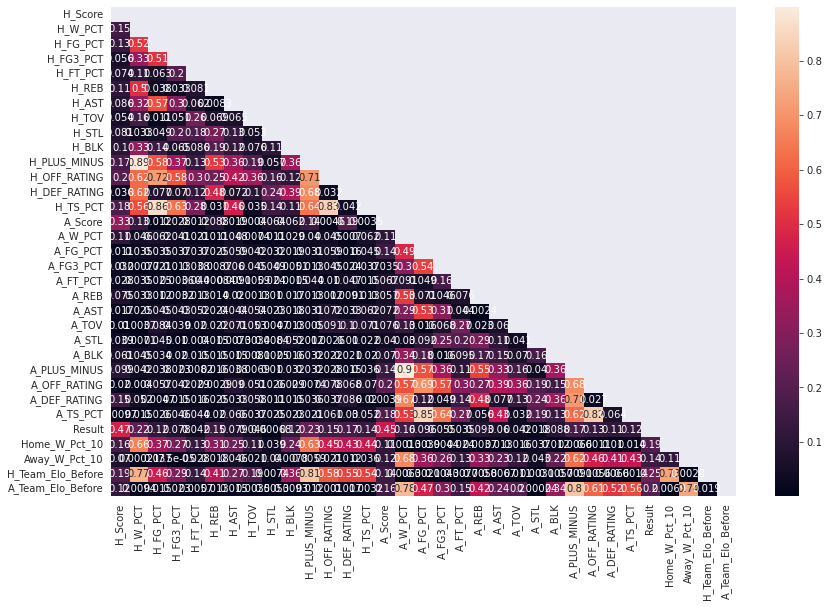

In [26]:
import numpy as np
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(14, 9))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    ax = sns.heatmap(abs(df.corr()),mask=mask,annot=True)
    fig.savefig('images/Corelation_Heatmap', bbox_inches="tight");

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import final dataset
#final_df = pd.read_csv('')

#drop non numeric columns
#df.drop(columns = ['Home', 'Away', 'Game_ID', 'Date', 'Season'], axis = 1, inplace = True )

X = final_df.drop(columns = 'Result')

y = final_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (1889, 30)
X test shape: (931, 30)


In [28]:
print(f"""Raw Counts 
{df["Result"].value_counts()}\n
Percentages 
{df["Result"].value_counts(normalize=True)}


We would get an accuracy score of 0.566312, i.e. about 56.6% accuracy

This is because about 56.6% of the results are wins""")

Raw Counts 
1    1597
0    1223
Name: Result, dtype: int64

Percentages 
1    0.566312
0    0.433688
Name: Result, dtype: float64


We would get an accuracy score of 0.566312, i.e. about 56.6% accuracy

This is because about 56.6% of the results are wins


In [29]:
print("Train percent wins:", y_train.value_counts(normalize=True)[1])
print("Test percent wins:", y_test.value_counts(normalize=True)[1])

Train percent wins: 0.5664372683959767
Test percent wins: 0.5660580021482277


In [81]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [84]:
# Create Dummy/Baseliner
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

dummy_model_pipe = Pipeline(steps=[
    ('dum', DummyRegressor(strategy='mean'))
])

In [86]:
dummy_pipe = ModelWithCV(dummy_model_pipe, 'dummy_model', X_train, y_train)

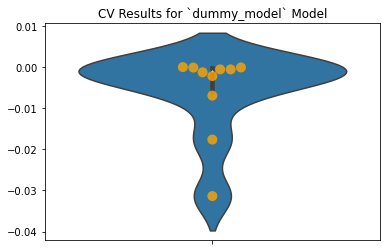

In [88]:
f, ax = plt.subplots()
dummy_pipe.plot_cv(ax);


In [89]:
dummy_pipe.print_cv_summary()

CV Results for `dummy_model` model:
            -0.00610 ± 0.00989 accuracy
        


In [90]:
# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, decomposition


loreg_model_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', decomposition.PCA()),
    ('logreg', LogisticRegression(random_state=42))
])

In [94]:
params = {}
params['logreg__C'] = np.logspace(-4, 4, 50)
params['logreg__penalty'] = ['l1', 'l2', 'elasticnet', 'none']
params['logreg__solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params['logreg__max_iter'] = [1000, 2000, 3000]
params['logreg__multi_class'] = ['auto', 'ovr', 'multinomial']
params['logreg__class_weight'] = [dict, 'balanced', None]
params['logreg__n_jobs'] = [None, 1, 10, 30, 50]

In [95]:
logreg_gridsearch = GridSearchCV(loreg_model_pipe, params, cv=10, verbose =1)

In [96]:
#logreg_gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 135000 candidates, totalling 1350000 fits


KeyboardInterrupt: 

In [30]:
# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model,
                                           X_train,
                                           y_train, 
                                           scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.6349593878553351

In [31]:
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

baseline_cv_score = cross_val_score(baseline_model, 
                              X_train,
                              y_train, 
                              cv=5)

mean_baseline_cv_score = np.mean(baseline_cv_score)

print(f"Mean Cross Validation Score: {mean_baseline_cv_score :.2%}")

print(f"Mean Cross Validation Score: {np.round(mean_baseline_cv_score * 100, 2)}%")

Mean Cross Validation Score: 64.00%
Mean Cross Validation Score: 64.0%


In [37]:
baseline_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [None, 1, 10, 30, 70],
    'class_weight': [None, dict, 'balanced'],
    'max_iter': [1000, 2000, 3000]
 
}

In [39]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
baseline_grid_search = GridSearchCV(estimator=baseline_model, param_grid=baseline_param_grid, cv=5, return_train_score=True)

# Fit to the data
baseline_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [1, 10, 20, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [40]:
# Mean training score
baseline_gs_training_score = np.mean(baseline_grid_search.cv_results_['mean_train_score'])

# Mean test score
baseline_gs_testing_score = baseline_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {np.round(baseline_gs_training_score * 100 , 2)}\n")
print(f"Mean Test Score: {np.round(baseline_gs_testing_score * 100, 2)}\n")

print("Best Parameter Combination Found During Grid Search:")
print(f"Optimal Parameters: {baseline_grid_search.best_params_}\n")
print(f"Testing Accuracy: {baseline_grid_search.best_score_ :.2%}")

Mean Training Score: nan

Mean Test Score: 62.62

Best Parameter Combination Found During Grid Search:
Optimal Parameters: {'class_weight': None, 'multi_class': 'multinomial', 'n_jobs': 1, 'penalty': 'l2', 'solver': 'sag'}

Testing Accuracy: 64.16%


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
mean_rf_cv_score = cross_val_score(rf_clf, 
                                   X_train, 
                                   y_train, 
                                   cv=10)

mean_rf_cv_score = np.mean(mean_rf_cv_score)

print(f"Mean Cross Validation Score for Random Forest Classifier: {np.round(mean_rf_cv_score * 100, 2)}%")

Mean Cross Validation Score for Random Forest Classifier: 62.25%


In [51]:
rf_param_grid = {
    'n_estimators': [5, 7, 9, 13, 19],
    'criterion': ['log_loss', 'entropy'],
    'max_depth': [None, 3, 4, 5, 6, 14],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [40, 45, 50, 55, 60, 65, 70],
    'max_features' : ["sqrt", "log2", None],
    'class_weight' : [None, "balanced"],
    'max_samples': [None, 1, 5, 10, 15]
    
}

In [52]:
rf_grid_search = GridSearchCV(estimator=rf_clf,
                             param_grid=rf_param_grid,
                             cv=3,
                             return_train_score=True)

rf_grid_search.fit(X_train, y_train)

# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {np.round(rf_gs_training_score * 100, 2)}")
print(f"Mean Test Score: {np.round(rf_gs_testing_score * 100, 2)}")
print("Best Parameter Combination Found During Grid Search:")

print(f"Optimal Parameters: {rf_grid_search.best_params_}")


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")

Mean Training Score: nan
Mean Test Score: 63.05
Best Parameter Combination Found During Grid Search:
Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 70, 'min_samples_split': 2, 'n_estimators': 19}
Testing Accuracy: 64.53%



In [57]:
rf_param_grid2 = {
    'n_estimators': [21, 23, 25],
    'criterion': ['log_loss', 'entropy', 'gini'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [60, 65, 70],
    'max_features' : ["sqrt", "log2", None],
    'class_weight' : [None, "balanced"],
    'max_samples': [None, 1, 5, 10]
    
}

In [58]:
rf_grid_search = GridSearchCV(estimator=rf_clf,
                             param_grid=rf_param_grid2,
                             cv=10,
                             return_train_score=True)

rf_grid_search.fit(X_train, y_train)

# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {rf_gs_training_score :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

print(f"Optimal Parameters: {rf_grid_search.best_params_}")


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")

Mean Training Score: nan
Mean Test Score: 63.27
Best Parameter Combination Found During Grid Search:
Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 70, 'min_samples_split': 2, 'n_estimators': 23}
Testing Accuracy: 64.64%



In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_rf_cv_score = cross_val_score(gnb,
                                  X_train,
                                  y_train,
                                  cv=10)

mean_gnb_cv_score = np.mean(gnb_rf_cv_score)



print(f"Mean Cross Validation Score for Gaussian Naive Bayes: {np.round(mean_gnb_cv_score * 100, 2)}%")

Mean Cross Validation Score for Gaussian Naive Bayes: 63.21%


In [74]:
gnb_param_grid = {
    'var_smoothing': np.logspace(0,-5, num=100),
    #'var_smoothing': [1e-11, 1e-10, 1e-9]
}

In [75]:
from sklearn.metrics import classification_report

In [76]:
gnb_grid_search = GridSearchCV(estimator=gnb,
                             param_grid=gnb_param_grid,
                             cv=10,
                             return_train_score=True)

gnb_grid_search.fit(X_train, y_train)

# Mean training score
gnb_grid_train_score = np.mean(gnb_grid_search.cv_results_['mean_train_score'])

# Mean test score
gnb_grid_test_score = gnb_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {gnb_grid_train_score: .2%}\n")
print(f"Mean Test Score: {gnb_grid_test_score: .2%}\n")

print("Best Parameter Combination Found During Grid Search:")
print(f"Optimal Parameters: {gnb_grid_search.best_params_}\n")
print(f"Testing Accuracy: {gnb_grid_search.best_score_: .2%}\n")


best_gnb_grid = gnb_grid_search.best_estimator_
best_gnb_grid.fit(X_train, y_train)
y_pred_gnb = best_gnb_grid.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

Mean Training Score:  64.43%

Mean Test Score:  63.16%

Best Parameter Combination Found During Grid Search:
Optimal Parameters: {'var_smoothing': 0.006734150657750821}

Testing Accuracy:  64.85%

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       404
           1       0.66      0.71      0.69       527

    accuracy                           0.63       931
   macro avg       0.62      0.62      0.62       931
weighted avg       0.63      0.63      0.63       931



In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, baseline_model.predict(X_test))

0.6272824919441461

In [33]:
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

19.564050154872646

In [37]:
# Run this cell without changes
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42)

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

0.6349593878553351

In [38]:
print(baseline_neg_log_loss_cv)
print(kfold_scores)

[-0.63187121 -0.61178737 -0.64102496 -0.6416575  -0.6484559 ]
[-0.63187121 -0.61178737 -0.64102496 -0.6416575  -0.6484559 ]


In [39]:
model_less_regularization = LogisticRegression(solver="saga",
                                              penalty="elasticnet",
                                              l1_ratio=.5,
                                              random_state=42,
                                              class_weight={1: 0.33},
                                              C=1e5)

In [40]:
# Ignore this cell
model_less_regularization.get_params()

{'C': 100000.0,
 'class_weight': {1: 0.33},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

solver: saga
penalty: elasticnet


In [42]:
# Ignore this cell
model_alternative_solver = LogisticRegression(solver="lbfgs",
                                              penalty="l2",
                                              l1_ratio=.5,
                                              random_state=42,
                                              class_weight={1: 0.33},
                                              C=1e5)
model_alternative_solver

LogisticRegression(C=100000.0, class_weight={1: 0.33}, l1_ratio=0.5,
                   random_state=42)

In [43]:
model_more_iterations = LogisticRegression(solver="saga",
                                              penalty="elasticnet",
                                              l1_ratio=.5,
                                              random_state=42,
                                              class_weight={1: 0.33},
                                              C=1e5,
                                              max_iter=2000)


In [44]:
final_model = model_less_regularization

In [45]:
# Instantiate StandardScaler
scaler = StandardScaler()


# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)


# Transform X_test
X_test_scaled = scaler.transform(X_test)

In [46]:
# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
# sm = SMOTE(random_state=42, sampling_strategy=.40)
from imblearn.over_sampling import SMOTE

# Fit and transform X_train_scaled and y_train using sm
#X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)

In [47]:
final_model.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight={1: 0.33}, l1_ratio=0.5,
                   penalty='elasticnet', random_state=42, solver='saga')

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_model.predict(X_test_scaled))

0.6272824919441461

In [49]:
# Import the relevant function
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, final_model.predict(X_test_scaled))

0.6914893617021277

In [50]:
# Import the relevant function
from sklearn.metrics import recall_score

# Display the recall score
recall_score(y_test, final_model.predict(X_test_scaled))

0.6166982922201139

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

#script to test the effectivenes of each model, uses default parameters
#test six different classification models 
def run_exps(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    
    results = []
    
    names = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    target_names = ['win', 'loss']
    
    for name, model in models:
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        results.append(cv_results)
        names.append(name)
        
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
    final = pd.concat(dfs, ignore_index=True)
    
    return final
final = run_exps(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

         win       0.58      0.51      0.54       404
        loss       0.66      0.72      0.69       527

    accuracy                           0.63       931
   macro avg       0.62      0.61      0.61       931
weighted avg       0.62      0.63      0.62       931

RF
              precision    recall  f1-score   support

         win       0.60      0.56      0.58       404
        loss       0.68      0.71      0.69       527

    accuracy                           0.65       931
   macro avg       0.64      0.64      0.64       931
weighted avg       0.64      0.65      0.64       931

KNN
              precision    recall  f1-score   support

         win       0.54      0.52      0.53       404
        loss       0.64      0.67      0.65       527

    accuracy                           0.60       931
   macro avg       0.59      0.59      0.59       931
weighted avg       0.60      0.60      0.60       931

SVM
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.017997,0.005923,0.669312,0.667580,0.669312,0.660146,0.701989,LogReg
1,0.018486,0.005042,0.629630,0.626268,0.629630,0.621380,0.686139,LogReg
2,0.028909,0.007936,0.582011,0.581963,0.582011,0.563129,0.656475,LogReg
3,0.019531,0.004933,0.642857,0.637319,0.642857,0.633702,0.678049,LogReg
4,0.022357,0.004988,0.636605,0.636197,0.636605,0.636396,0.682232,LogReg
5,0.439534,0.028303,0.611111,0.607189,0.611111,0.607911,0.661144,RF
6,0.370554,0.027826,0.616402,0.612163,0.616402,0.609485,0.650255,RF
7,0.366892,0.027721,0.574074,0.571142,0.574074,0.562670,0.640203,RF
8,0.367659,0.028196,0.611111,0.605324,0.611111,0.605940,0.632997,RF
9,0.364012,0.028165,0.591512,0.594344,0.591512,0.592781,0.636843,RF


# Model Performance

In [52]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

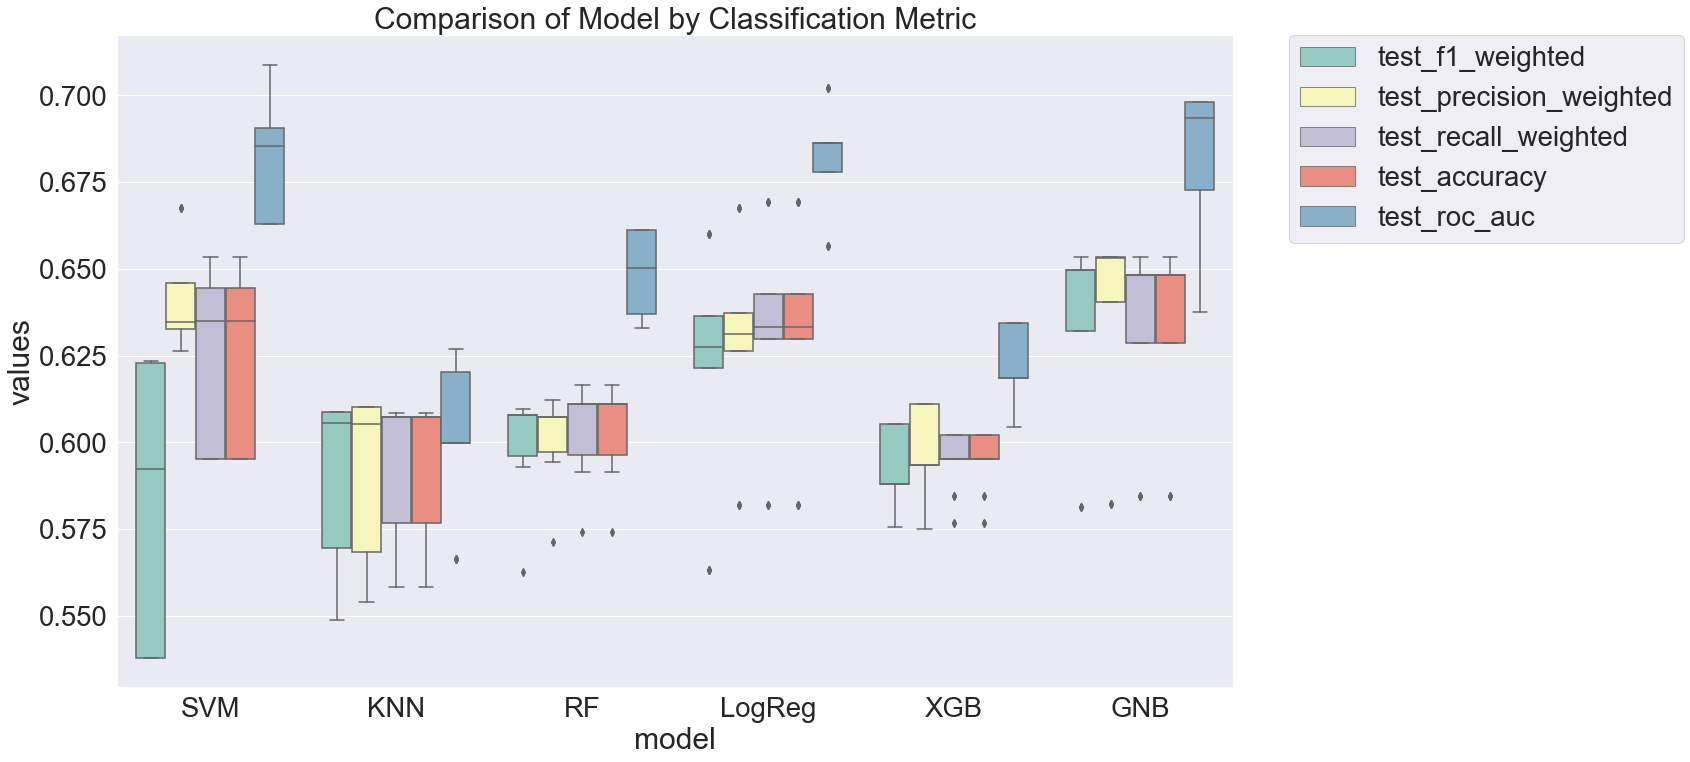

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

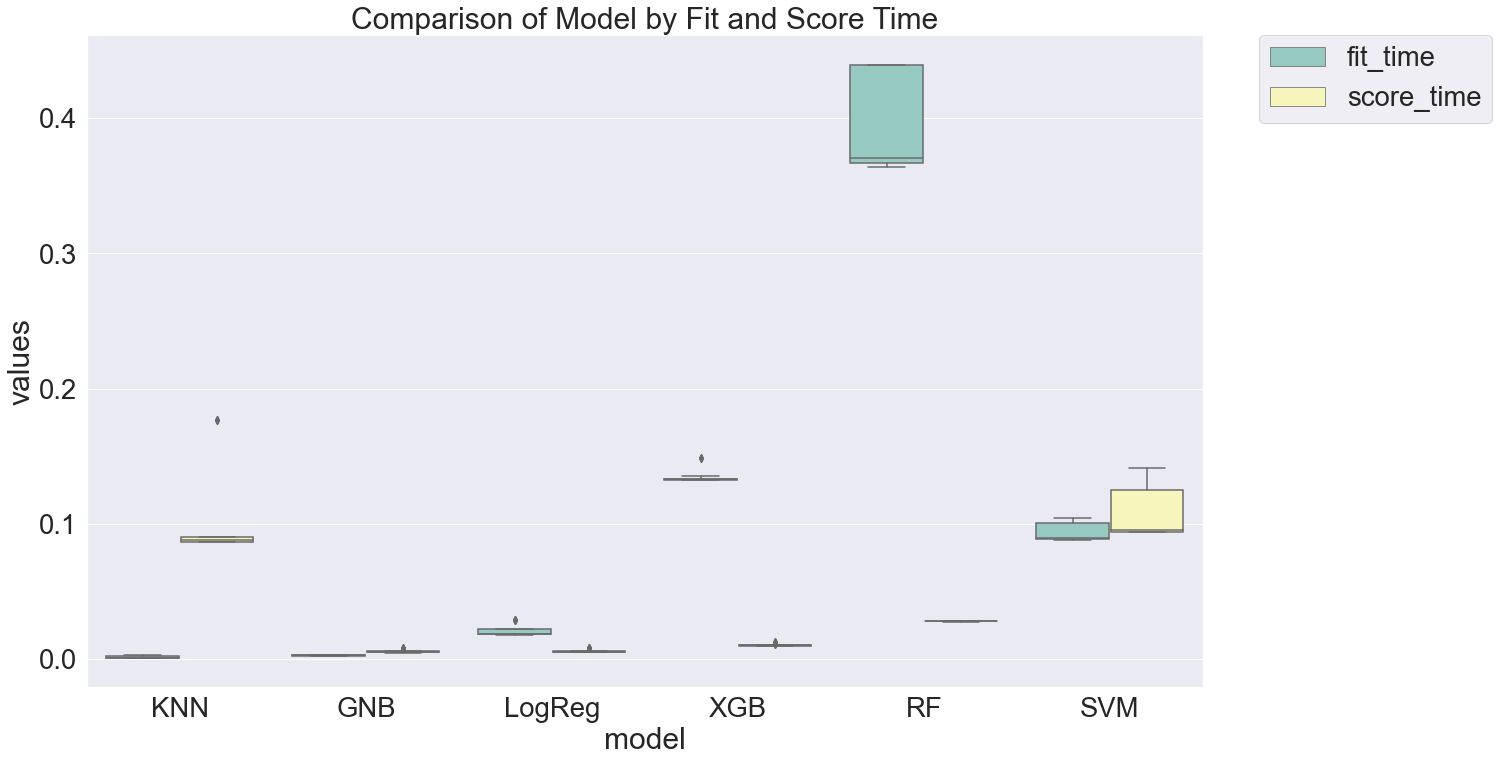

In [54]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [55]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_accuracy            \
                        std      mean           std      mean   
model                                                           
GNB                0.023756  0.634140      0.023756  0.634140   
KNN                0.020934  0.590782      0.020934  0.590782   
LogReg             0.029507  0.631850      0.029507  0.631850   
RF                 0.012383  0.605957      0.012383  0.605957   
SVM                0.023784  0.624535      0.023784  0.624535   
XGB                0.008018  0.594975      0.008018  0.594975   

       test_f1_weighted           test_precision_weighted            \
                    std      mean                     std      mean   
model                                                                 
GNB            0.025172  0.634583                0.025856  0.637820   
KNN            0.024812  0.587695                0.023396  0.589654   
LogReg         0.033437  0.622510                0.028892  0.629806   
RF             0.012321  0.601842                0.010598  0.603005   
SVM            0.036406  0.583702                0.014271  0.641724   
XGB            0.010006  0.592788                0.011944  0.596416   

       test_roc_auc            
                std      mean  
model                          
GNB        0.022106  0.681378  
KNN        0.022497  0.601832  
LogReg     0.015427  0.682444  
RF         0.011387  0.646717  
SVM        0.017273  0.681860  
XGB        0.010526  0.622533

# Final Selected Model
- grid search for parameters 
- Gaussian NB

In [56]:
# Gaussian NB only has one parameter 'var_smoothing'
# Portion of the largest variance of all features that is added to variances for calculation stability.
# Number of different combinations of parameters 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

target_names = ['Win', 'Loss']

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)

gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=kfold,   
                 verbose=1, 
                 scoring='accuracy', n_jobs=-1) 

gs_NB.fit(X_train, y_train)

best_gs_grid = gs_NB.best_estimator_
best_gs_grid.fit(X_train, y_train)
y_pred_best_gs = best_gs_grid.predict(X_test)

print(classification_report(y_test, y_pred_best_gs, target_names=target_names))
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

         Win       0.59      0.46      0.52       404
        Loss       0.65      0.76      0.70       527

    accuracy                           0.63       931
   macro avg       0.62      0.61      0.61       931
weighted avg       0.62      0.63      0.62       931



{'var_smoothing': 0.03511191734215131}

In [57]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred_best_gs)
print(confusionMatrix)

[[186 218]
 [127 400]]


# Confusion Matrix

In [58]:
confusionMatrix = confusion_matrix(y_test, y_pred_best_gs)  

    # Code below prints model accuracy information
print('Coefficient Information:')

for i in range(len(featureColumns)):  

    logregCoefficients = logreg.coef_

    currentFeature = featureColumns[i]
    currentCoefficient = logregCoefficients[0][i]

    print(currentFeature + ': ' + str(currentCoefficient))

print('----------------------------------')

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

print('----------------------------------')

print('Confusion Matrix:')
print(confusionMatrix)

Coefficient Information:


NameError: name 'featureColumns' is not defined

# Saving Model

In [ ]:
import pickle

# Saves the model in folder to be used in future
# filename should be end in '.pkl'
def save_model(model, filename):

    with open(filename, 'wb') as file:
        pickle.dump(model, file)
save_model()